---
title: "Opening Economy Extension"
subtitle: "Business Cycles and Fluctuations - AE2E6"
format:
    ipynb:
        output_file: problem_correction.ipynb

    html:
        output-file: problem_correction.html
resources:
    - "*.mod"
listing:
    id: mod-listings
    contents:
        - "*.mod"
    fields: [filename]
---

::: {.callout-note collapse="true" title="Objectives"}

- Modify a modfile with a model extension.
- Compare model solutions for different parameterizations.

::: 

::: {.callout-tip title="Modfiles" collapse="true"}

:::: {#mod-listings}
::::

:::

Uncomment the following lines to install needed packages (if not already present).

In [1]:
# uncomment the next lines, the first time you run
# import Pkg; Pkg.add(["DBnomics", "Dynare", "DataFrames"])

# Small Open Economy

Start from the same rbc [model](rbc_fixed.mod).
Assume the representative agent can save $b^{\star}_t$ as foreign assets, remunerated at a constant interest rate $r^{\star}-1$.


__Write the new budget constraint for the representative household.__

:::: {.callout-warning title="Correction" collapse="true"}

At given date t, the household saves $b^{\star}_t$ in the foreigh country and receives repayment $b^{\star}_{t-1}$ plus interests $(r^{\star} − 1)b^{\star}_{t-1}$ . 
Starting from the RBC constraint, the new constraint becomes:
$$c_t + i_t + b^ {\star}_t \leq w_t n_t + r_t k_{t-1} + r^ {\star} b^{\star}_{t-1}$$

and the lagrangian is:


$$\mathcal{L} = E_t \sum_{j=0}^\infty \beta^j\left[\log c_{t+j} + \chi \dfrac{(1-n_{t+j})^{1-\eta}}{1-\eta} \right.$$

$$+\lambda_{t+j} (w_{t+j}n_{t+j} + r_{t+j}k_{t+j-1} - c_{t+j}-k_{t+j} + (1-\delta)k_{t+j-1} + r^* b^*_{t+j-1} - b^*_{t+j} )\Bigg]$$

::::

__Write the new optimality condition.__

:::: {.callout-warning title="Correction" collapse="true"}

We must add the optimality condition relative to $b^{\star}_t$ : the representative household chooses amount of savings to maximise its intertemporal utility of consumption. We find :

$$ -\lambda_t + \beta E_t[\lambda_{t+1}r^*]=0$$
or :
$$ \frac{1}{c_t}=\beta r^* E_t\left[\frac{1}{c_{t+1}} \right]$$

::::


__What is the long run constraint on interest rate $r^{\star}$?__

:::: {.callout-warning title="Correction" collapse="true"}

In the deterministic steady-state the euler equation implies $r^{\star}= \frac{1}{\beta}$ .
In principle $r^{\star}$ is a a foreign interest rate determined by factors external to the country. Yet $\frac{1}{\beta}$ is the only value it can take that is compatible with the existence of a long run steady-state.
This can be interpreted as an arbitrage condition: $\frac{1}{\beta}$ is the domestic intesrest rate. If it was lower/higher than world interest rate, there would be infinite capital flows from/to the country.

(in a deterministic setting the arbitrage principle implies that all investment opportunities must yield the same return)

::::

__Update the modfile (set $\overline{b^{\star}}=0$)__

:::: {.callout-warning title="Correction" collapse="true"}

To update the modfile, one must declare a new variable $b^{\star}$ and the new parameter $r^\star$. The latter is set to $\frac{1}{\beta}$ .
One must also add the above optimality condition and update the equation characterizing the equilibrium on the goods markets. That one comes from the budget constraint. Rewriting the budget constraint for a small open economy we have:

$$c_t + i_t + b^{\star}_t = w_t n_t + r_t k_{t-1} + r^{\star} b^{\star}_{t-1}$$

Since we assume competitive markets, the firm doesn't do any profit. We have $y_t = w_t n_t + r_t k_{t−1}$ and:

$$c_t + i_t + b^{\star}_t - r^{\star} b^{\star}_{t-1} = y_t$$


Next, we can observe that the static model doesn't pin down the steady-state level of  $b^{\star}$  ; we set it to 0, so that the steady-state values of all other variables ar unchanged. We thus add $b^{\star}=0$ in the `steady_state_model;` block.

::::

In [25]:
using Dynare

context = @dynare "rbc_open.mod";
# saving the result in context is useful for future comparison

Dynare version: 0.9.11
2024-04-28T18:18:42.966: Starting @dynare rbc_open.mod
["rbc_open.mod", "language=julia", "json=compute"]
Dynare preprocessor version: 6.4.0+0
2024-04-28T18:18:42.977: End of preprocessing
2024-04-28T18:18:42.981: Start parse_statements!
  Coefficients of approximate solution function (reduced form)

───────────┬─────────────────────────────────────────────────────────────────────────────
           │   y_t      i_t     c_t      n_t    a_t        b_t      k_t      r_t     w_t
─────────────────────────────────────────────────────────────────────────────────────────
      ϕ(a) │  1.2438  21.1617  0.2685    0.231  0.95  -20.1864  21.1617   0.0644  1.2796
      ϕ(b) │ -0.0077  -0.1389  0.0077  -0.0043   0.0    1.1439  -0.1389  -0.0004  0.0077
      ϕ(k) │  0.0744  -1.1189   0.008   0.0163   0.0    1.1854  -0.1439  -0.0033  0.0632
 epsilon_t │  1.3092  22.2754  0.2826   0.2431   1.0  -21.2488  22.2754   0.0678   1.347
───────────┴──────────────────────────────────────

Starting preprocessing of the model file ...
Found 9 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
6 block(s) found:
  5 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 4 equation(s)
                                 and 2 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Normalization failed with cutoff, trying symbolic normalization...
Could not normalize the dynamic model. Variable i is not in the maximum cardinality matching.
JSON written after Computing step.
Preprocessing completed.













2024-04-28T18:18:43.055: End parse_statements!
2024-04-28T18:18:43.055: End parser


longname: c
texname: c
symboltype: Endogenous
orderintype: 3
longname: b
texname: b
symboltype: Endogenous
orderintype: 6
longname: r
texname: r
symboltype: Endogenous
orderintype: 8
longname: khi
texname: khi
symboltype: Parameter
orderintype: 5
longname: a
texname: a
symboltype: Endogenous
orderintype: 5
longname: nss
texname: nss
symboltype: Parameter
orderintype: 4
longname: bet
texname: bet
symboltype: Parameter
orderintype: 1
longname: i
texname: i
symboltype: Endogenous
orderintype: 2
longname: y
texname: y
symboltype: Endogenous
orderintype: 1
longname: del
texname: del
symboltype: Parameter
orderintype: 2
endogenous_nbr: 9
exogenous_nbr: 1
lagged_exogenous_nbr: 0
exogenous_deterministic_nbr: 0
parameter_nbr: 8
original_endogenous_nbr: 9
lead_lag_incidence: [0 0 0 0 1 2 3 0 0; 4 5 6 7 8 9 10 11 12; 0 0 13 0 0 0 0 14 0]
n_static: 4
n_fwrd: 2
n_bkwrd: 3
n_both: 0
n_states: 3
DErows1: [1, 2, 3, 4, 5]
DErows2: Int64[]
n_dyn: 5
i_static: [1, 2, 4, 9]
i_dyn: [3, 5, 6, 7, 8]
i_bkwrd: 

Context(Dict{String, DynareSymbol}("c" => , "b" => , "r" => , "khi" => , "a" => , "nss" => , "bet" => , "i" => , "y" => , "del" => …), Model[], , Results(ModelResults[]), , Dict{Any, Any}(LinearRationalExpectations.LinearRationalExpectationsWs => Dict{String, LinearRationalExpectations.LinearRationalExpectationsWs}("GS" => LinearRationalExpectations.LinearRationalExpectationsWs(LinearRationalExpectations.Indices([1, 2, 3, 4, 5, 6, 7, 8, 9], [3, 8], [3, 8], [5, 6, 7], Int64[], [1, 2, 3, 4, 8, 9], [1, 2, 4, 9], [3, 5, 6, 7, 8], [3, 5, 6, 7, 8], [1, 2, 3, 4, 5], [1, 5], [2, 3, 4], [6, 8, 9, 10, 11], [4, 5, 7, 12], [15], 9, (D = [1, 2, 3, 4, 5], jacobian = [8, 9, 10, 13, 14]), (E = [1, 2, 3, 4, 5], jacobian = [1, 2, 3, 6, 11]), Int64[], Int64[]), [-2.4748361534325016 0.40406715354187744 5.143325007715999 0.8203787662819934; 0.0 -1.3552600250241889 1.5334686017699561 0.24459373610746454; … ; -0.02093204936846925 -0.006240834563068046 0.019880737515252916 0.03444085580768032; -0.404067153541

__Print theoretical moments. Comment.__

:::: {.callout-warning title="Correction" collapse="true"}

In the output from the above question we have:

```
THEORETICAL MOMENTS

──────────┬─────────────────────────────
 VARIABLE │  MEAN   STD. DEV.  VARIANCE
────────────────────────────────────────
        y │    NaN        NaN       NaN
        k │    NaN        NaN       NaN
        i │    NaN        NaN       NaN
        c │    NaN        NaN       NaN
        n │    NaN        NaN       NaN
        a │    1.0     0.0288    0.0008
        b │    NaN        NaN       NaN
        r │ 0.0454      0.002       0.0
        w │ 1.7797     0.0388    0.0015
──────────┴─────────────────────────────
```

We can see that Dynare cannot compute the moments (mean and standard deviation) for all variables.
This is a property associated to the existence of a unit root: the ergodic distribution of this variables is undefined.

We say the model is non-stationary.

::::


__Simulate the model over 100 periods. Comment.__

:::: {.callout-warning title="Correction" collapse="true"}


The simulation horizon is specified in the `stoch_simul(irf=200, order=1)` as the argument to the `irf` keyword. The result is stored in the `rbc_open/graphs` subfolder. 

Note that dynare-matlab allows you to select which variables to plot by adding a list of variables after the command (as in `stoch_simul(irf=200, order=1) y c i b`). This functionality has not been ported yet to Dynare Julia which prints by default the 8 first variables. You can instead

- reorder the variables in the declaration statement to list first the ones we want to print
- make a custom plot with Plots.jl (we do in the last question)

![](rbc_open/graphs/irfs_epsilon_1.png)


Even with a unit root, the model can be solved and simulated.

Since the opening up of the economy, in response to the productivity shock capital flows in to finance a jump in investment.

The irfs show a persistent effect of the shock on the debt position, as well as most other variables.

When the savings of all households increase, there is no stabilizing force to bring them back to their original level.

Households and as a result the whole country behaves like a ricardian agent: they increase their consumption permanently by consuming the interests on their assets.

Since their consumption increase their consumption leisure tradeoff is also modified, which is why the labour supply is also permanently changed.

Since the return on capital must be kept equal to world interest rate (by the arbitrage condition), it returns to the steady-state after one period.

::::

__Assume the foreign interest rate depends on the amount of foreign assets__

$$r^{\star}_t=\frac{1}{\beta} + exp(-\kappa b^{\star}_t) - 1$$

__with $\kappa=0.001$. How do you interpret the equation for $r^{\star}_t$. How should you modify the model equations?__

:::: {.callout-warning title="Correction" collapse="true"}


With this specification, when the representative housheold holds more assets, their return decrease. This could be a proxy for the fact that international markets have limited depth.

Conversely, when the domestic household become more indebted, international lenders require a higher interest rate. In that case, it could mean that international investors don't have infinitely deep pockets or interpreted as a higher risk premium.

The precise specification is also chosen so that it collapses to the $r^{\star}=\frac{1}{\beta}$ when $b^{\star}_t=0$. This allows us to keep essentially the same steady-state as before for all other variables.

To update the modfile, we need to declare $r^{\star}$  as a variable not a parameter and move its steady-state value $r^{\star} = \frac{1}{β}$ to the block `steady_state_model;`. Finally the above equation endogenizing the interest rate must augment the `model;` block.

Note that the Euler equation is unchanged by the addition of the endogenous interest rate. This is because the households (and as a result the representative household) does not internalize the effect of its borrowing/saving on the interest rate when it chooses its optimal decisions.

::::

__Update the modfile and comment on the generated moments. Do they depend on the choice of $\kappa$?__

In [ ]:
using Dynare 
#run modified modfile rbc_open_stationary
# save result for future comparison
context_stationary = @dynare "rbc_open_stationary.mod";

:::: {.callout-warning title="Correction" collapse="true"}

With the addition of a small friction we obtain the well defined following moments:

```
  THEORETICAL MOMENTS

──────────┬─────────────────────────────
 VARIABLE │  MEAN   STD. DEV.  VARIANCE
────────────────────────────────────────
        k │ 6.3702     0.3979    0.1583
        i │ 0.1593     0.1329    0.0177
        y │ 0.8765      0.057    0.0033
        a │    1.0     0.0288    0.0008
        n │   0.33     0.0109    0.0001
        c │ 0.7173     0.0272    0.0007
        b │    0.0     0.6257    0.3914
        r │ 0.0454     0.0008       0.0
        w │ 1.7797      0.076    0.0058
      rst │ 1.0204     0.0006       0.0
──────────┴─────────────────────────────
```

We obtain the following irf:

![](rbc_open_stationary/graphs/irfs_epsilon_1.png)

As before there is a jump in investment, financed by external borrowing ($b$ becomes negative). Since effect is slowed down by an increase in the interest rate.

::::

:::: {.callout-warning title="Correction" collapse="true"}


If we set $\kappa=0.005$ instead we obtain the following theoretical moments:

```
  THEORETICAL MOMENTS

──────────┬────────────────────────────────────────────────────────
 VARIABLE │  STD. DEV. (kappa=0.001)       STD. DEV. (kappa=0.005)      
───────────────────────────────────────────────────────────────────
        k │           0.3979                       0.4371       
        i │           0.1329                       0.1551       
        y │            0.057                        0.063       
        a │           0.0288                       0.0288       
        n │           0.0109                       0.0137       
        c │           0.0272                       0.0272       
        b │           0.6257                       0.9907       
        r │           0.0008                       0.0007       
        w │            0.076                       0.0758       
      rst │           0.0006                       0.0005       
──────────┴────────────────────────────────────────────────────────  
```

We observe rather high increase in the volatility of debt, but milder changes for capital, investment, output, labour, wages...
In particular the RBC moments (std dev of investment / consumption over std dev of production) move very little.

Another interesting exercise consists in comparing the impulse response functions obtained with $\kappa=0.000$, $\kappa=0.001$ and $\kappa=0.005$ (see code below).

In the short run, the dynamic responses are very similar for all variables, 
except consumption which does not jump anymore to its long run trend as long as 
there is a small friction on the interest rate.
Overall the addition of the friction slows down the adjustment of production variables to the productivty shock.

In the long run, the friction implies a return to the initial steady-state counteracting the short term effect of the exogenous shock.


::::

In [ ]:
context_stationary_high_kappa = @dynare "rbc_open_stationary_kappa05.mod";

In [18]:
irfs_kappa_00 = context.results.model_results[1].irfs[:epsilon]
irfs_kappa_01 = context_stationary.results.model_results[1].irfs[:epsilon]
irfs_kappa_05 = context_stationary_high_kappa.results.model_results[1].irfs[:epsilon]

┌────┬───────────┬─────────────┬────────────┬────────────┬──────────────┬───────
│    │         k │           i │          y │          a │            n │      ⋯
├────┼───────────┼─────────────┼────────────┼────────────┼──────────────┼───────
│  1 │   0.15411 │     0.15411 │  0.0106942 │      0.009 │   0.00157627 │ 0.00 ⋯
│  2 │  0.144746 │ -0.00551077 │  0.0226249 │    0.00855 │   0.00456974 │ 0.00 ⋯
│  3 │  0.135886 │ -0.00524152 │  0.0211295 │  0.0081225 │   0.00417893 │ 0.00 ⋯
│  4 │  0.127503 │  -0.0049856 │  0.0197166 │ 0.00771638 │    0.0038111 │ 0.00 ⋯
│  5 │  0.119573 │ -0.00474235 │  0.0183819 │ 0.00733056 │   0.00346504 │ 0.00 ⋯
│  6 │  0.112073 │ -0.00451112 │  0.0171213 │ 0.00696403 │   0.00313957 │  0.0 ⋯
│  7 │   0.10498 │ -0.00429134 │   0.015931 │ 0.00661583 │   0.00283361 │ 0.00 ⋯
│  8 │ 0.0982728 │ -0.00408242 │  0.0148073 │ 0.00628504 │    0.0025461 │ 0.00 ⋯
│  9 │ 0.0919321 │ -0.00388383 │  0.0137467 │ 0.00597078 │   0.00227607 │ 0.00 ⋯
│ 10 │ 0.0859388 │ -0.003695

The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted


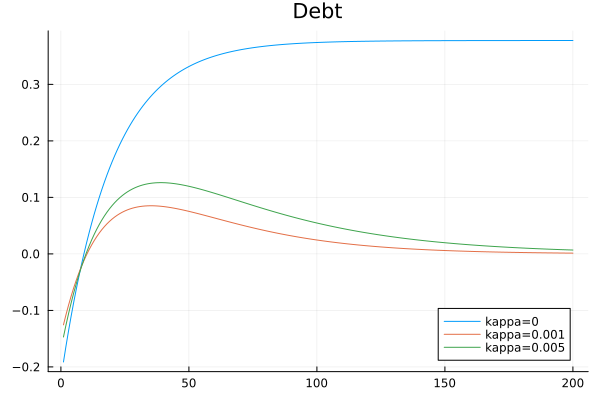

In [20]:
using Plots
pl_b = plot(irfs_kappa_00[:b], title="Debt", label="kappa=0")
plot!(pl_b, irfs_kappa_01[:b], label="kappa=0.001")
plot!(pl_b, irfs_kappa_05[:b], label="kappa=0.005")

The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted


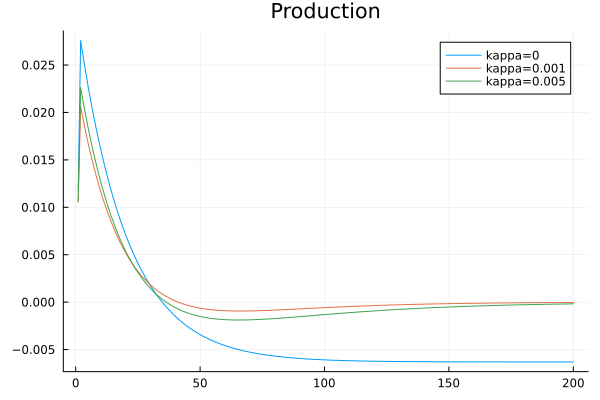

In [21]:
using Plots
pl_y = plot(irfs_kappa_00[:y], title="Production", label="kappa=0")
plot!(pl_y, irfs_kappa_01[:y], label="kappa=0.001")
plot!(pl_y, irfs_kappa_05[:y], label="kappa=0.005")

The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted


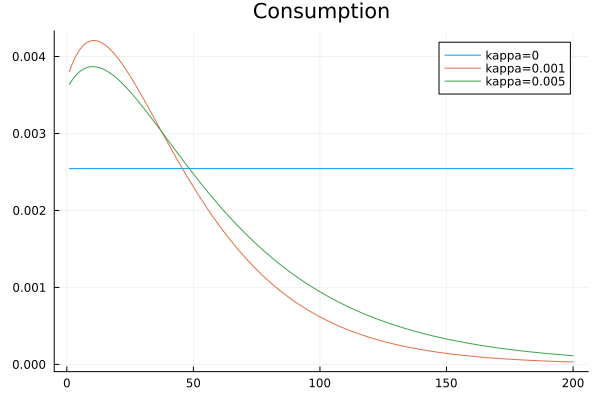

In [22]:
using Plots
pl_c = plot(irfs_kappa_00[:c], title="Consumption", label="kappa=0")
plot!(pl_c, irfs_kappa_01[:c], label="kappa=0.001")
plot!(pl_c, irfs_kappa_05[:c], label="kappa=0.005")

The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted
The number of labels is different than the number of variables to be plotted


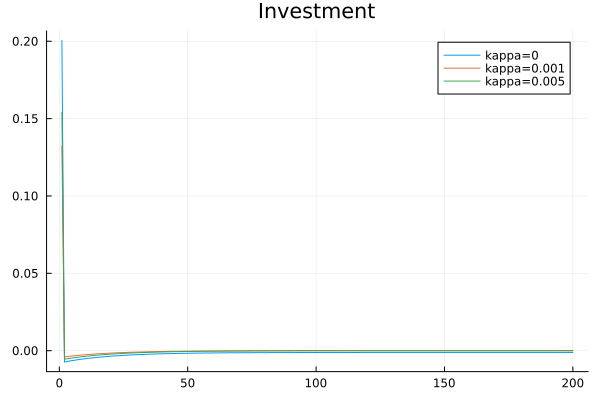

In [23]:
using Plots
pl_i = plot(irfs_kappa_00[:i], title="Investment", label="kappa=0")
plot!(pl_i, irfs_kappa_01[:i], label="kappa=0.001")
plot!(pl_i, irfs_kappa_05[:i], label="kappa=0.005")

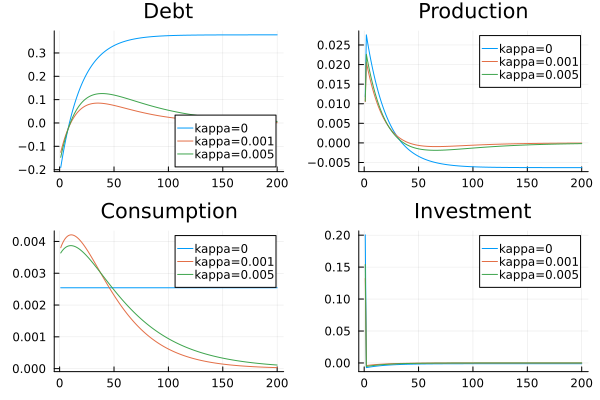

In [24]:
plot(pl_b, pl_y, pl_c, pl_i)